In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(801, 20532)


,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
labels = pd.read_csv('labels.csv')
print(labels.shape)
labels.head()

(801, 2)


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [ ]:
data = data.iloc[:, 1:20532]

In [ ]:
data = data[data != 0]

In [ ]:
data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,NaN,2.017209,3.265527,5.478487,10.431999,NaN,7.175175,0.591871,NaN,NaN,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,NaN
1,NaN,0.592732,1.588421,7.586157,9.623011,NaN,6.816049,NaN,NaN,NaN,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,NaN
2,NaN,3.511759,4.327199,6.881787,9.870730,NaN,6.972130,0.452595,NaN,NaN,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,NaN
3,NaN,3.663618,4.507649,6.659068,10.196184,NaN,7.843375,0.434882,NaN,NaN,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,NaN
4,NaN,2.655741,2.821547,6.539454,9.738265,NaN,6.566967,0.360982,NaN,NaN,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,NaN,1.865642,2.718197,7.350099,10.006003,NaN,6.764792,0.496922,NaN,NaN,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,NaN
797,NaN,3.942955,4.453807,6.346597,10.056868,NaN,7.320331,NaN,NaN,NaN,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,NaN
798,NaN,3.249582,3.707492,8.185901,9.504082,NaN,7.536589,1.811101,NaN,NaN,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,NaN,2.590339,2.787976,7.318624,9.987136,NaN,9.213464,NaN,NaN,NaN,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,NaN


In [ ]:
data.loc[data['gene_0'].isnull()].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            790, 791, 792, 793, 794, 796, 797, 798, 799, 800],
           dtype='int64', length=766)

In [ ]:
for i in range(801):
  print(data.loc[data['gene_'+str(i)].isnull()].index)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            790, 791, 792, 793, 794, 796, 797, 798, 799, 800],
           dtype='int64', length=766)
Int64Index([ 32,  33,  38,  39,  77,  93, 110, 146, 167, 175, 196, 198, 200,
            206, 282, 292, 364, 386, 388, 406, 430, 507, 522, 542, 591, 623,
            633, 682, 718, 735, 776],
           dtype='int64')
Int64Index([112, 314, 473, 572, 573, 633, 728], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([], dtype='int64')
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            791, 792, 793, 794, 795, 796, 797, 798, 799, 800],
           dtype='int64', length=801)
Int64Index([], dtype='int64')
Int64Index([  1,   5,   7,  10,  12,  13,  15,  18,  19,  20,
            ...
            782, 783, 784, 785, 788, 789, 791, 797, 799, 800],
           dtype='int64', length=307)
Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            79

In [ ]:
data_za_brisati = []
for i in range(801):
  data1 = data.loc[data['gene_'+str(i)].isnull()].index
  data2 = data1.values
  if len(data1) > 400:
    string = 'gene_'+str(i)
    data_za_brisati.append(string)

In [ ]:
data_za_brisati

['gene_0',
 'gene_5',
 'gene_8',
 'gene_9',
 'gene_13',
 'gene_14',
 'gene_15',
 'gene_16',
 'gene_17',
 'gene_23',
 'gene_24',
 'gene_25',
 'gene_30',
 'gene_37',
 'gene_41',
 'gene_42',
 'gene_43',
 'gene_84',
 'gene_108',
 'gene_168',
 'gene_169',
 'gene_185',
 'gene_204',
 'gene_219',
 'gene_220',
 'gene_222',
 'gene_235',
 'gene_236',
 'gene_237',
 'gene_239',
 'gene_254',
 'gene_255',
 'gene_266',
 'gene_274',
 'gene_283',
 'gene_284',
 'gene_287',
 'gene_288',
 'gene_290',
 'gene_304',
 'gene_353',
 'gene_356',
 'gene_404',
 'gene_418',
 'gene_445',
 'gene_450',
 'gene_464',
 'gene_465',
 'gene_479',
 'gene_481',
 'gene_493',
 'gene_497',
 'gene_516',
 'gene_517',
 'gene_561',
 'gene_579',
 'gene_590',
 'gene_595',
 'gene_596',
 'gene_608',
 'gene_610',
 'gene_616',
 'gene_617',
 'gene_636',
 'gene_700',
 'gene_706',
 'gene_710',
 'gene_713',
 'gene_759',
 'gene_764',
 'gene_766',
 'gene_779',
 'gene_787']

In [ ]:
data.drop(data_za_brisati, inplace= True, axis = 1)

In [ ]:
data

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_18,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.591871,1.334282,2.015391,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,NaN
1,0.592732,1.588421,7.586157,9.623011,6.816049,NaN,NaN,0.587845,2.466601,NaN,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,NaN
2,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,NaN,0.452595,1.981122,1.683023,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,NaN
3,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,NaN,0.434882,2.874246,1.267356,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,NaN
4,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,NaN,1.275841,2.141204,0.889707,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1.865642,2.718197,7.350099,10.006003,6.764792,0.496922,NaN,NaN,3.328722,0.496922,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,NaN
797,3.942955,4.453807,6.346597,10.056868,7.320331,NaN,NaN,1.049282,2.666211,NaN,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,NaN
798,3.249582,3.707492,8.185901,9.504082,7.536589,1.811101,7.448149,4.049317,3.464198,1.002595,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,2.590339,2.787976,7.318624,9.987136,9.213464,NaN,1.578746,1.800703,3.635255,NaN,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,NaN


In [ ]:
data = data.fillna(0)

In [ ]:
data

,gene_1,gene_2,gene_3,gene_4,gene_6,gene_7,gene_10,gene_11,gene_12,gene_18,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,2.017209,3.265527,5.478487,10.431999,7.175175,0.591871,0.591871,1.334282,2.015391,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.592732,1.588421,7.586157,9.623011,6.816049,0.000000,0.000000,0.587845,2.466601,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,3.511759,4.327199,6.881787,9.870730,6.972130,0.452595,0.000000,0.452595,1.981122,1.683023,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,3.663618,4.507649,6.659068,10.196184,7.843375,0.434882,0.000000,0.434882,2.874246,1.267356,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,2.655741,2.821547,6.539454,9.738265,6.566967,0.360982,0.000000,1.275841,2.141204,0.889707,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1.865642,2.718197,7.350099,10.006003,6.764792,0.496922,0.000000,0.000000,3.328722,0.496922,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,3.942955,4.453807,6.346597,10.056868,7.320331,0.000000,0.000000,1.049282,2.666211,0.000000,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,3.249582,3.707492,8.185901,9.504082,7.536589,1.811101,7.448149,4.049317,3.464198,1.002595,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,2.590339,2.787976,7.318624,9.987136,9.213464,0.000000,1.578746,1.800703,3.635255,0.000000,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [ ]:
data = data.iloc[:, 1:20532].values

In [ ]:
data_center = data-np.mean(data,axis=0)

In [ ]:
y = labels.iloc[:,1]
target_names = y.unique()
print(target_names)

['PRAD' 'LUAD' 'BRCA' 'KIRC' 'COAD']


In [ ]:
pca = PCA(n_components=2)
pca.fit(data_center)
data_pca = pca.transform(data_center)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(data_center, y)
data_lda = lda.transform(data_center)

Text(0.5, 1.0, 'PCA')

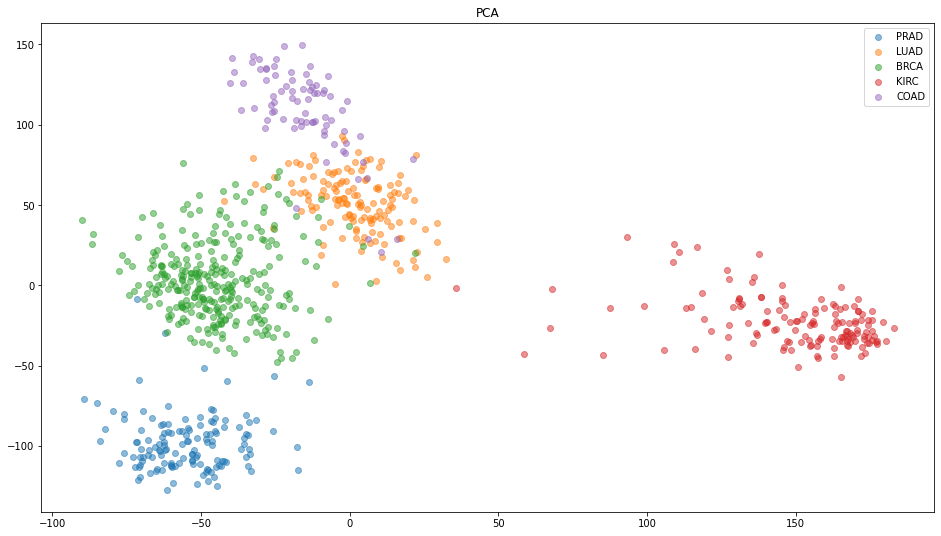

In [ ]:
plt.figure(figsize=(16,9))

for i in target_names:
    plt.scatter(data_pca[y == i, 0], data_pca[y == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('PCA')

Text(0.5, 1.0, 'LDA')

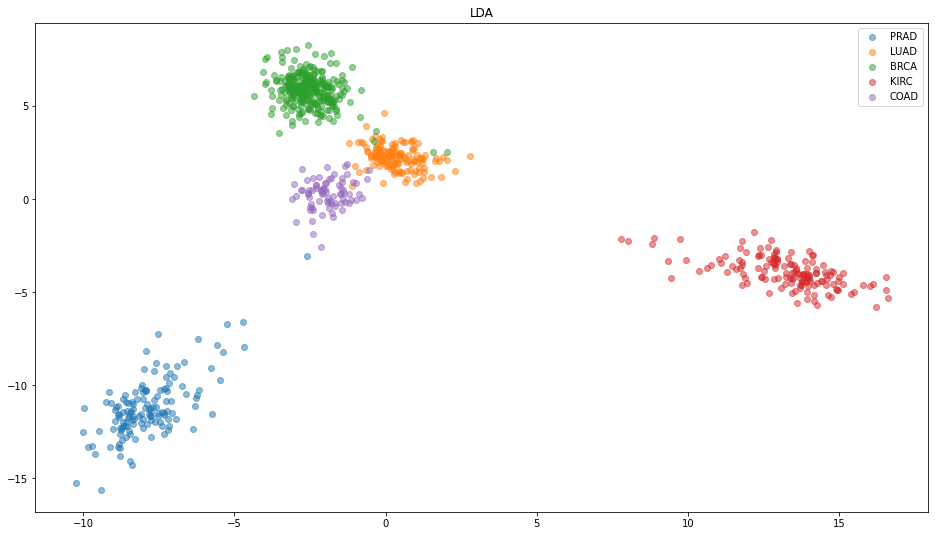

In [ ]:
plt.figure(figsize=(16,9))

for i in target_names:
    plt.scatter(data_lda[y == i, 0], data_lda[y == i, 1], alpha=.5, label=i)
plt.legend()
plt.title('LDA')

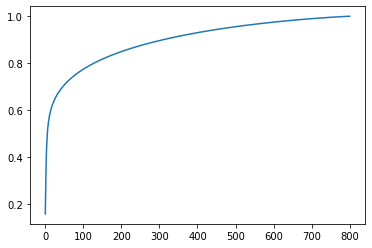

In [ ]:
#zavisnost objašnjene varijanse od broja PCA komponenti
pca = PCA(n_components=None)
pca.fit(data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

BEZ REDUKCIJE DIMENZIONALNOSTI

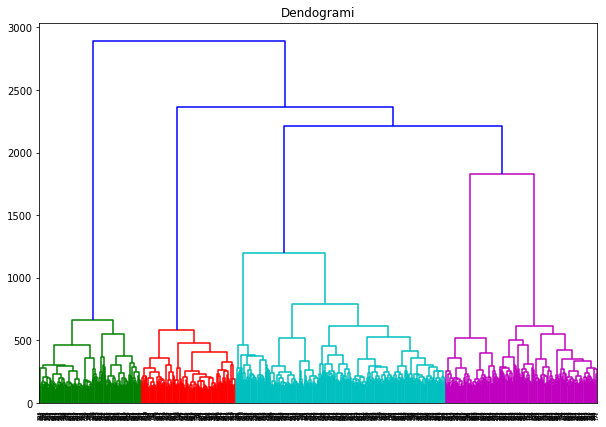

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Dendogrami")
dend = shc.dendrogram(shc.linkage(data, method='ward', metric='euclidean'))

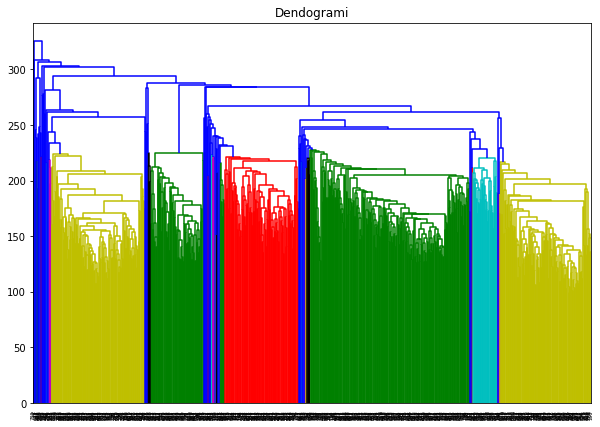

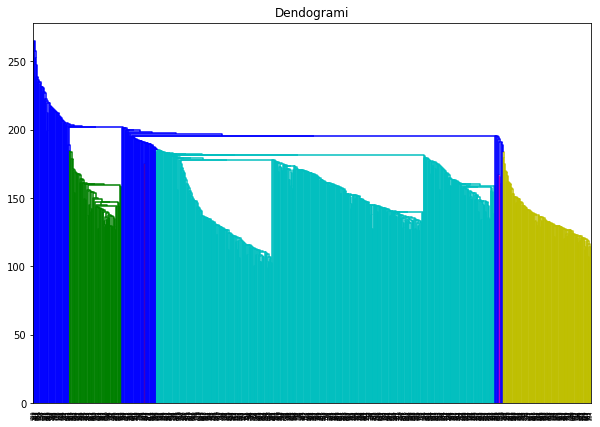

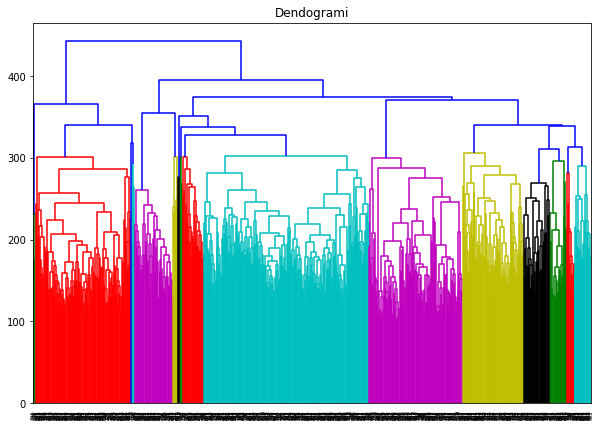

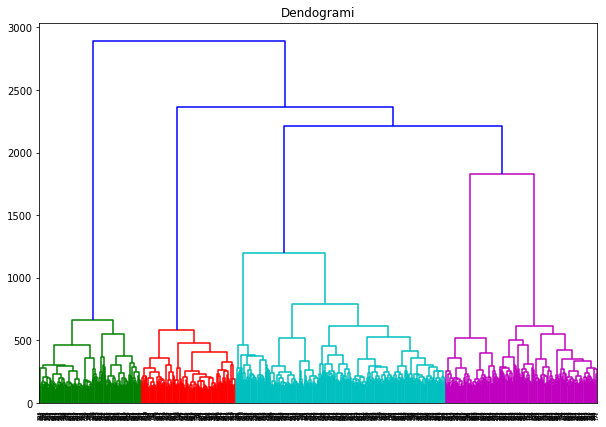

In [ ]:
for m in ['average', 'single', 'complete', 'ward']:
  for me in ['euclidean']:
    plt.figure(figsize=(10, 7))
    plt.title("Dendogrami")
    dend = shc.dendrogram(shc.linkage(data, method=m, metric=me))

OVDE MOZE DA SE STAVI MERENJE VREMENA

In [ ]:
from sklearn.cluster import AgglomerativeClustering

import time
start = time.time()

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)
print(cluster.labels_)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[2 3 2 2 0 2 1 2 0 2 0 1 2 0 0 0 3 1 1 2 0 1 3 0 1 3 4 0 0 0 0 0 1 0 2 0 1
 3 0 0 1 2 2 1 1 0 2 4 0 3 0 3 0 2 4 0 0 4 1 0 3 1 0 3 2 4 0 2 1 0 1 0 0 3
 0 3 0 1 2 4 0 2 0 0 2 2 0 0 1 0 2 2 0 0 0 2 4 0 2 0 0 1 0 1 3 1 3 4 3 3 2
 0 3 2 0 1 1 1 0 0 3 1 3 0 2 2 2 0 1 0 4 0 4 0 0 1 3 0 1 4 0 2 0 1 3 4 2 0
 3 3 3 3 0 0 3 0 0 2 2 3 2 3 1 0 2 3 4 1 3 0 1 3 0 3 0 0 0 2 0 1 4 1 0 2 2
 2 3 3 0 3 3 1 3 2 3 0 0 0 3 3 0 1 1 1 1 2 0 2 0 3 3 0 2 0 2 0 0 0 3 0 1 3
 1 1 3 0 1 2 0 3 3 2 4 0 1 2 1 4 0 1 1 3 2 2 3 3 1 0 0 4 0 2 4 0 2 1 2 2 2
 0 4 4 3 4 4 2 3 0 0 1 1 0 4 2 1 2 0 0 1 0 0 0 0 3 3 0 0 0 1 1 1 1 0 0 0 1
 0 0 3 2 0 0 4 3 2 0 0 0 4 0 2 0 4 3 3 2 1 0 1 1 3 4 1 0 0 0 0 1 0 0 2 0 1
 0 3 2 1 0 2 4 0 0 0 3 3 3 0 0 2 3 0 1 0 4 4 3 0 1 0 0 0 4 3 4 1 2 1 0 0 1
 0 4 2 3 2 0 1 2 0 4 1 1 4 4 2 0 0 4 1 3 2 0 0 0 3 3 1 3 0 1 4 2 0 3 2 0 0
 0 3 0 0 2 0 2 4 0 3 0 0 3 0 0 0 1 3 2 0 2 1 0 1 4 0 2 3 1 0 0 1 0 3 0 0 2
 4 0 1 3 2 0 2 0 0 0 0 1 3 0 1 0 0 3 3 1 4 2 4 0 1 1 0 2 1 4 3 3 0 2 2 0 2
 3 1 2 0 3 2 3 0 0 4 3 1 

Text(0.5, 1.0, 'Anglomerativno bez redukcije dimenzionalnosti')

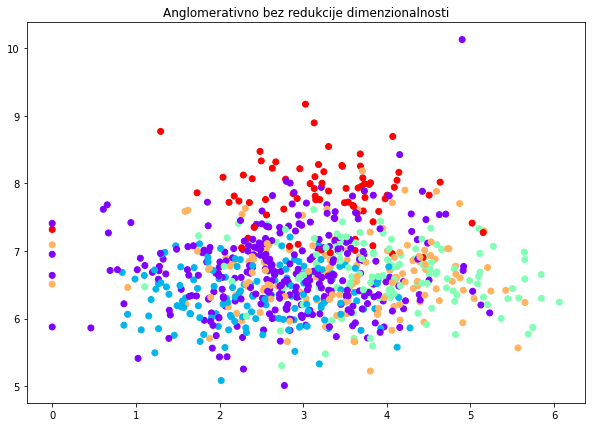

In [ ]:
plt.figure(figsize=(10, 7))

plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Anglomerativno bez redukcije dimenzionalnosti')

<Figure size 720x504 with 0 Axes>

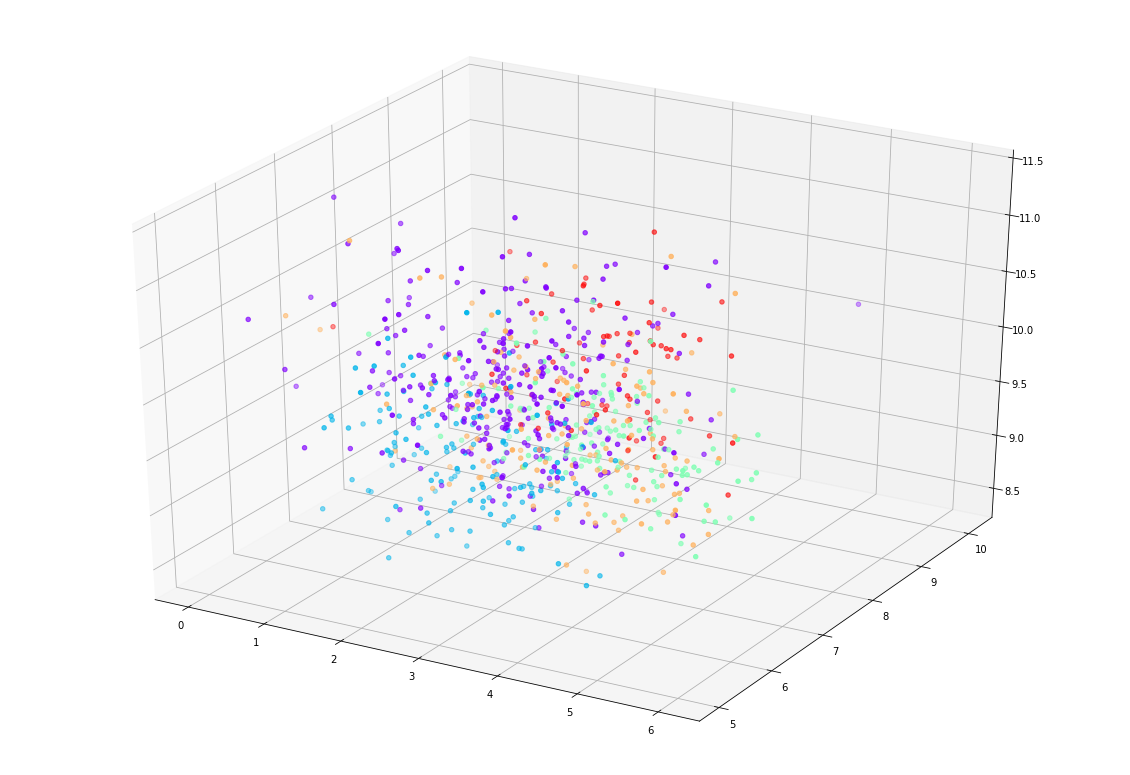

In [ ]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10, 7))
fig = plt.figure()
fig.set_size_inches(20, 14)
ax = fig.add_subplot( projection='3d')
ax.scatter3D(data[:,0], data[:,1], data[:,2], c=cluster.labels_, cmap='rainbow')

plt.show()

I OVDE

In [ ]:
from sklearn.cluster import KMeans

start = time.time()
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, 
                init='k-means++',random_state=42)
kmeans.fit_predict(data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[[2.44209827 6.34427761 9.44334076 ... 9.43000135 5.12209056 0.12948832]
 [3.97126223 6.6624332  9.75236325 ... 9.69678011 5.8496973  0.03572931]
 [3.23252914 7.82570638 9.93932731 ... 9.35115207 3.6022328  0.03282325]
 [2.80449053 6.69005602 9.99945158 ... 9.7851823  6.14993228 0.06894019]
 [3.47034268 6.6353129  9.78677214 ... 9.36805457 5.35571692 0.20880807]]
[1 4 1 1 3 1 0 1 3 1 3 0 1 3 3 3 4 0 0 1 3 0 4 3 0 4 2 3 3 3 3 3 0 3 1 3 0
 4 3 3 0 1 1 0 0 3 1 2 3 4 3 4 3 1 2 3 3 2 0 3 4 3 3 4 1 2 3 1 0 3 0 3 3 4
 3 4 3 0 1 2 3 1 3 3 1 1 3 3 0 3 1 1 3 3 3 1 2 3 1 3 3 0 3 0 4 0 4 2 4 4 1
 3 4 1 3 0 0 0 3 3 4 0 4 3 1 1 1 3 0 3 2 3 2 3 3 0 4 3 0 2 3 1 3 0 4 2 1 3
 4 4 4 4 3 3 4 3 3 1 1 4 1 4 0 3 1 4 2 0 4 3 0 4 3 4 3 3 3 1 3 0 2 0 3 1 1
 1 4 4 3 4 4 0 4 1 4 3 3 3 4 4 3 0 0 0 0 1 3 1 3 4 4 3 1 3 1 3 3 3 4 3 0 4
 0 0 4 3 0 1 3 4 4 1 2 3 0 1 0 2 3 0 0 4 1 1 4 4 0 3 3 2 3 1 2 3 1 0 1 1 1
 3 2 2 4 2 2 1 4 3 3 0 0 3 2 1 0 1 3 3 0 3 3 3 3 4 4 3 3 3 0 0 0 0 3 3 3 0
 3 3 4 1 3 3 2 4 1 3 3 3 2 3 1 3 2

Text(0.5, 1.0, 'Kmeans bez redukcije dimenzionalnosti')

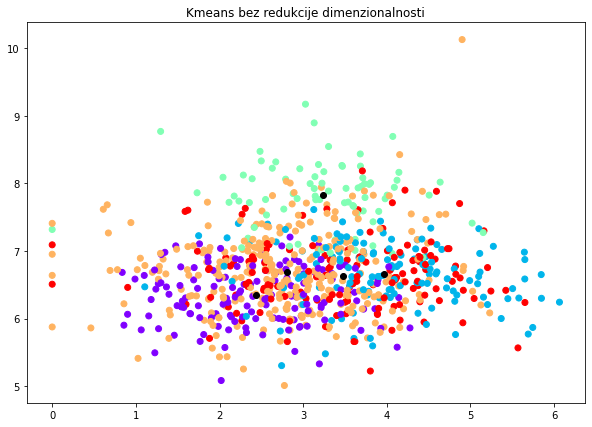

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Kmeans bez redukcije dimenzionalnosti')

<Figure size 720x504 with 0 Axes>

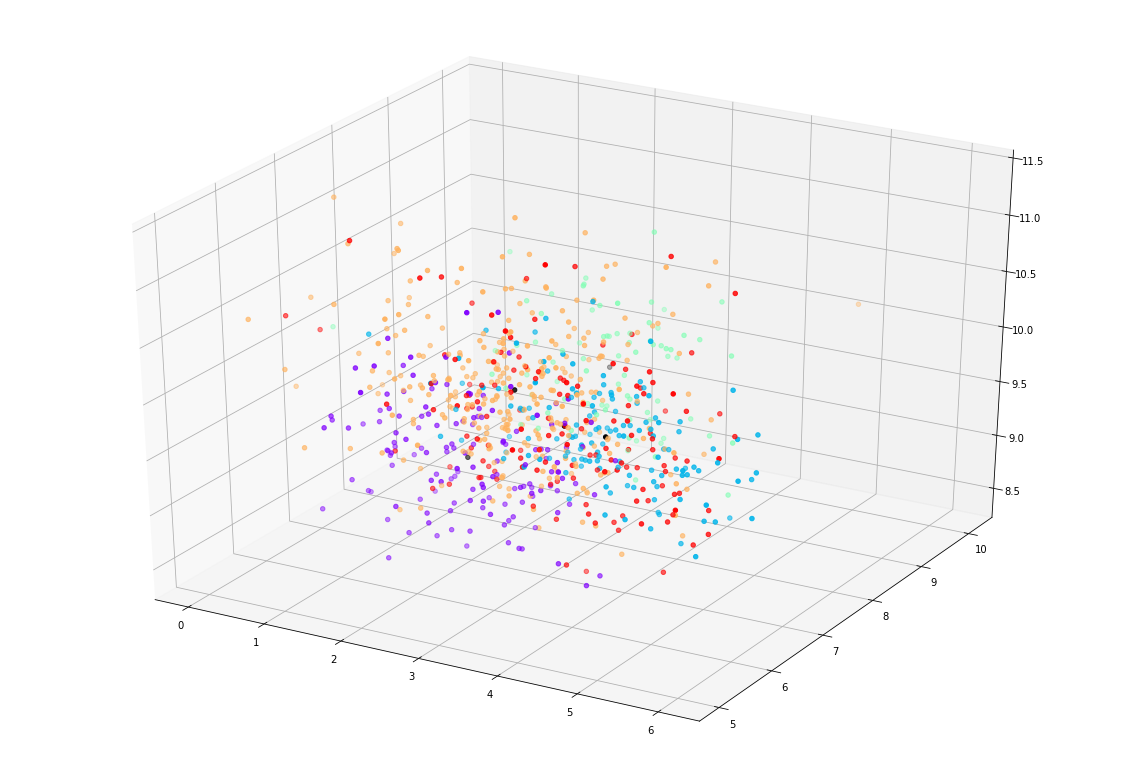

In [ ]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(10, 7))
fig = plt.figure()
fig.set_size_inches(20, 14)
ax = fig.add_subplot( projection='3d')
ax.scatter3D(data[:,0],data[:,1], data[:,2], c=kmeans.labels_, cmap='rainbow')
ax.scatter3D(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2], color='black')

plt.show()

In [ ]:
from sklearn import metrics
print('ARI: ', metrics.adjusted_rand_score(cluster.labels_, kmeans.labels_))
print('SIL for AGG: ', metrics.silhouette_score(data, cluster.labels_, metric='euclidean'))
print('SIL for Kmeans: ', metrics.silhouette_score(data, kmeans.labels_, metric='euclidean'))
print('CH for AGG: ', metrics.calinski_harabasz_score(data, cluster.labels_))
print('CH for Kmeans: ', metrics.calinski_harabasz_score(data, kmeans.labels_))
print('DB for AGG: ', metrics.davies_bouldin_score(data, cluster.labels_))
print('DB for Kmeans: ', metrics.davies_bouldin_score(data, kmeans.labels_))

ARI:  0.9962141050946053
SIL for AGG:  0.2244498652651024
SIL for Kmeans:  0.22456706924220157
CH for AGG:  124.34777963700661
CH for Kmeans:  124.44571712954509
DB for AGG:  1.832997553253215
DB for Kmeans:  1.8335967704819596


SA PCA

In [ ]:
pca = PCA(n_components=0.9)
pca.fit(data_center)
data_pca = pca.transform(data_center)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

Redukovani prostor ima dimenziju:  311


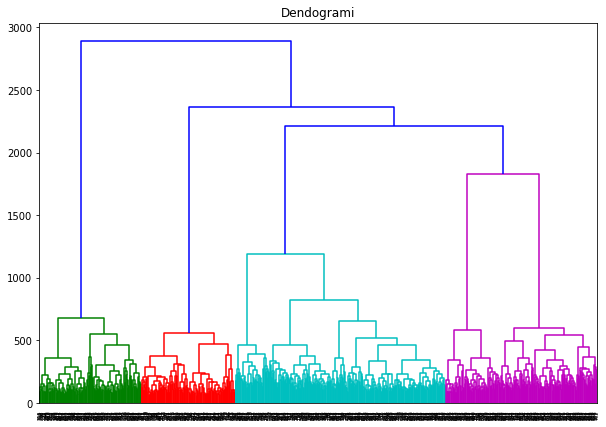

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendogrami")
dend = shc.dendrogram(shc.linkage(data_pca, method='ward', metric='euclidean'))

In [ ]:
start = time.time()

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_pca)
print(cluster.labels_)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[2 3 0 2 0 2 1 2 0 2 0 1 2 0 0 0 3 1 1 2 0 1 3 0 1 3 4 0 0 0 0 0 1 0 2 0 1
 3 0 0 1 2 2 1 1 0 2 4 0 3 0 3 0 2 4 0 0 4 1 0 3 1 0 3 2 4 0 2 1 0 1 0 0 3
 0 3 0 1 2 4 0 2 0 0 2 2 0 0 1 0 2 2 0 0 0 2 4 0 2 0 0 1 0 1 3 1 3 4 3 3 2
 0 3 2 0 1 1 1 0 0 3 1 3 0 2 2 2 0 1 0 4 0 4 0 0 1 3 0 1 4 0 2 0 1 3 4 2 0
 3 3 3 3 0 0 3 0 0 2 2 3 2 3 1 0 2 3 4 1 3 0 1 3 0 3 0 0 0 2 0 1 4 1 0 2 2
 2 3 3 0 3 3 1 3 2 3 0 0 0 3 3 0 1 1 1 1 2 0 2 0 3 3 0 2 0 2 0 0 0 3 0 1 3
 1 1 3 0 1 2 0 3 3 2 4 0 1 2 1 4 0 1 1 3 2 2 3 3 1 0 0 4 0 2 4 0 2 1 2 2 2
 0 4 4 3 4 4 2 3 0 0 1 1 0 4 2 1 2 0 0 1 0 0 0 0 3 3 0 0 0 1 1 1 1 0 0 0 1
 0 0 3 2 0 0 4 3 2 0 0 0 4 0 2 0 4 3 3 2 1 0 1 1 3 4 1 0 0 0 0 1 0 0 2 0 1
 0 3 2 1 0 2 4 0 0 0 3 3 3 0 0 2 3 0 1 0 4 4 3 0 1 0 0 0 4 3 4 1 2 1 0 0 1
 0 4 2 3 2 0 1 2 0 4 1 1 4 4 2 0 0 4 1 3 2 0 0 0 3 3 1 3 0 1 4 2 0 3 2 0 0
 0 3 0 0 2 0 2 4 0 3 0 0 3 0 0 0 1 3 2 0 2 1 0 1 4 0 2 3 1 0 0 1 0 3 0 0 2
 4 0 1 3 2 0 2 0 0 0 0 1 3 0 1 0 0 3 3 1 4 2 4 0 1 1 0 2 1 4 3 3 0 2 2 0 2
 3 1 2 0 3 2 3 0 0 4 3 1 

Text(0.5, 1.0, 'Anglomerativno sa PCA')

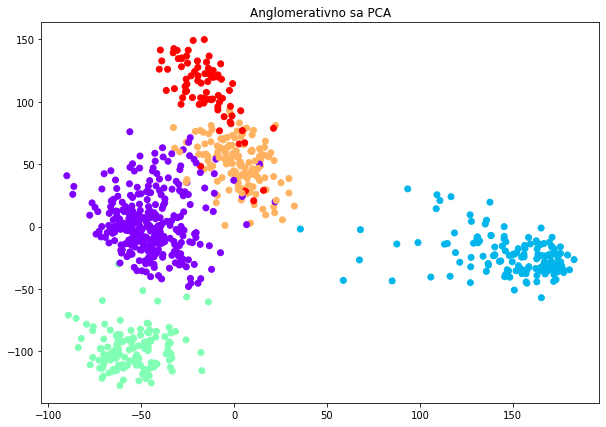

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:,0], data_pca[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Anglomerativno sa PCA')

In [ ]:
from sklearn.cluster import KMeans
start = time.time()

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, 
                init='k-means++',random_state=42)
# init moze biti 'random' uzorci ili odredjene vrednosti date matricom
kmeans.fit_predict(data_pca)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[[ 1.50488562e+02 -2.34303378e+01 -4.74974610e+00 ... -1.49239373e-02
  -1.46336404e-02  4.26876296e-03]
 [-5.47990513e+01 -9.79319176e+01  7.20653500e+01 ... -8.06268255e-02
  -2.81455681e-02 -2.00456562e-02]
 [ 1.83827372e+00  5.02020974e+01  1.27873877e+01 ...  6.85493908e-02
   8.05802282e-02 -5.04642559e-02]
 [-1.60709335e+01  1.11476234e+02  9.37259765e+01 ... -2.86553158e-02
   8.27767417e-02  9.91335520e-02]
 [-4.43967364e+01  3.69287467e+00 -5.97720453e+01 ...  1.84536745e-02
  -3.90190386e-02  5.75832117e-03]]
[1 2 1 1 4 1 0 1 4 1 4 0 1 4 4 4 2 0 0 1 4 0 2 4 0 2 3 4 4 4 4 4 0 4 1 4 0
 2 4 4 0 1 1 0 0 4 1 3 4 2 4 2 4 1 3 4 4 3 0 4 2 4 4 2 1 3 4 1 0 4 0 4 4 2
 4 2 4 0 1 3 4 1 4 4 1 1 4 4 0 4 1 1 4 4 4 1 3 4 1 4 4 0 4 0 2 0 2 3 2 2 1
 4 2 1 4 0 0 0 4 4 2 0 2 4 1 1 1 4 0 4 3 4 3 4 4 0 2 4 0 3 4 1 4 0 2 3 1 4
 2 2 2 2 4 4 2 4 4 1 1 2 1 2 0 4 1 2 3 0 2 4 0 2 4 2 4 4 4 1 4 0 3 0 4 1 1
 1 2 2 4 2 2 0 2 1 2 4 4 4 2 2 4 0 0 0 0 1 4 1 4 2 2 4 1 4 1 4 4 4 2 4 0 2
 0 0 2 4 0 1 4 2 2 1 3 4

Text(0.5, 1.0, 'Kmeans sa PCA')

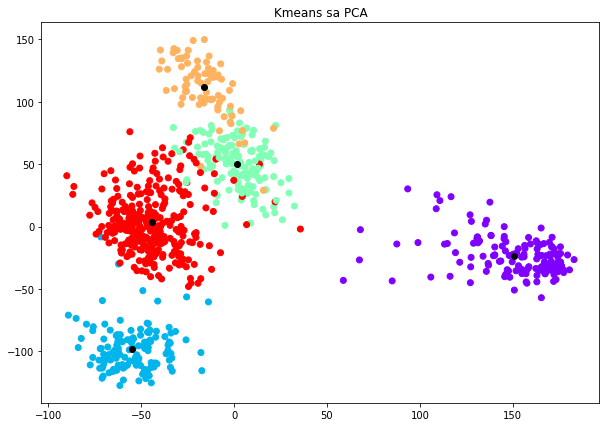

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_pca[:,0],data_pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Kmeans sa PCA')

In [ ]:
from sklearn import metrics
print('ARI: ', metrics.adjusted_rand_score(cluster.labels_, kmeans.labels_))
print('SIL for AGG: ', metrics.silhouette_score(data_pca, cluster.labels_, metric='euclidean'))
print('SIL for Kmeans: ', metrics.silhouette_score(data_pca, kmeans.labels_, metric='euclidean'))
print('CH for AGG: ', metrics.calinski_harabasz_score(data_pca, cluster.labels_))
print('CH for Kmeans: ', metrics.calinski_harabasz_score(data_pca, kmeans.labels_))
print('DB for AGG: ', metrics.davies_bouldin_score(data_pca, cluster.labels_))
print('DB for Kmeans: ', metrics.davies_bouldin_score(data_pca, kmeans.labels_))

ARI:  0.9888542115352813
SIL for AGG:  0.2586851451169295
SIL for Kmeans:  0.259364880823184
CH for AGG:  148.00284021213054
CH for Kmeans:  148.54560313723812
DB for AGG:  1.668555396930719
DB for Kmeans:  1.6718974994129057


SA LDA

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=4)
lda.fit(data_center, y)
data_lda = lda.transform(data_center)

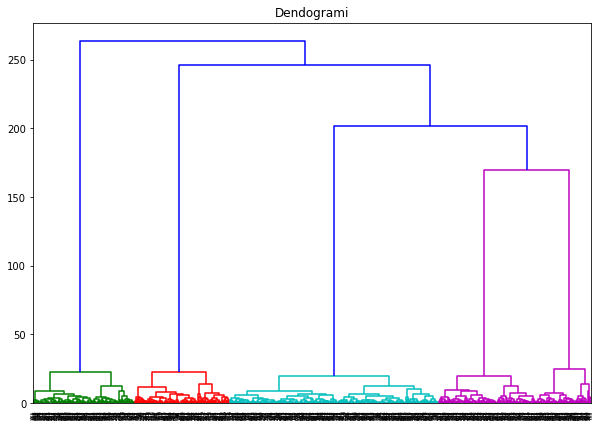

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendogrami")
dend = shc.dendrogram(shc.linkage(data_lda, method='ward', metric='euclidean'))

In [ ]:
start = time.time()

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_lda)
print(cluster.labels_)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[2 4 2 2 3 2 1 2 3 2 3 1 2 3 3 3 4 1 1 2 3 1 4 3 1 4 0 3 3 3 3 3 1 3 2 3 1
 4 3 3 1 2 2 1 1 3 2 0 3 4 3 4 3 2 0 3 3 0 1 3 4 1 3 4 2 0 3 2 1 3 1 3 3 4
 3 4 3 1 2 0 3 2 3 3 2 2 3 3 1 3 2 2 3 3 3 2 0 3 2 3 3 1 3 1 4 1 4 0 4 4 2
 3 4 2 3 1 1 1 3 3 4 1 4 3 2 2 2 3 1 4 0 3 0 3 3 1 4 3 1 0 3 2 3 1 4 0 2 3
 4 4 4 4 3 3 4 3 3 2 2 4 2 4 1 3 2 4 0 1 4 3 1 4 3 4 3 3 3 2 3 1 0 1 3 2 2
 2 4 4 3 0 4 1 4 2 4 3 3 3 4 4 3 1 1 1 1 2 3 2 3 4 4 3 2 3 2 3 3 3 4 3 1 4
 1 1 4 3 1 2 3 4 4 2 0 3 1 2 1 0 3 1 1 4 2 2 4 4 1 3 3 0 3 2 0 3 2 1 2 2 2
 3 0 0 4 0 0 2 4 3 3 1 1 3 0 2 1 2 3 3 1 3 3 3 3 4 4 3 3 3 1 1 1 1 3 3 3 1
 3 3 4 2 3 3 0 4 2 3 3 3 0 3 2 3 0 4 4 2 1 3 1 1 4 0 1 3 3 3 3 1 3 3 2 3 1
 3 4 2 1 3 2 0 3 3 3 4 4 4 3 3 2 4 3 1 3 0 0 4 3 1 3 3 3 0 4 0 1 2 1 3 3 1
 3 0 2 4 2 3 1 2 3 0 1 1 0 0 2 3 3 0 1 3 2 3 3 3 4 4 1 4 3 1 0 2 3 4 2 3 3
 3 4 3 3 2 3 2 0 3 4 3 3 4 3 3 3 1 4 2 3 2 1 3 1 0 3 2 4 1 3 3 1 3 4 3 3 2
 0 3 1 4 2 3 2 3 3 3 3 1 4 3 1 3 3 4 4 1 0 2 0 3 1 1 3 2 1 0 4 4 3 2 2 3 2
 4 1 2 3 4 2 4 3 3 0 4 1 

Text(0.5, 1.0, 'Anglomerativno sa LDA')

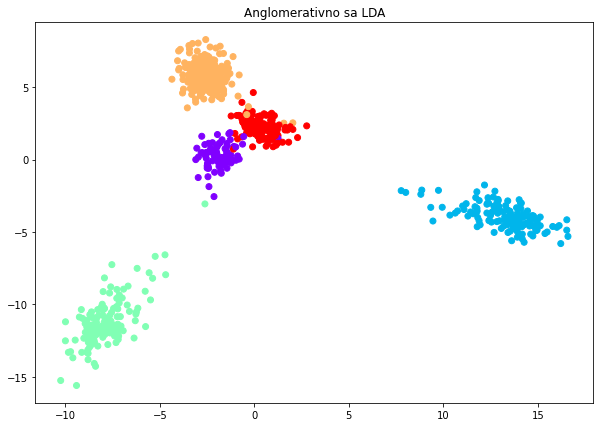

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_lda[:,0], data_lda[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Anglomerativno sa LDA')

In [ ]:
from sklearn.cluster import KMeans

start = time.time()

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, 
                init='k-means++',random_state=42)
# init moze biti 'random' uzorci ili odredjene vrednosti date matricom
kmeans.fit_predict(data_lda)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[[ -2.53239373   5.82018215   3.5024619    1.53244012]
 [ 13.22843846  -3.91777374   1.7555129    1.17649271]
 [ -7.90499861 -11.22566748   2.33603217  -0.19567921]
 [  0.33572787   2.23126419  -4.22785906  -7.79710296]
 [ -1.91364511   0.26893588 -13.20233502   6.31763843]]
[2 3 2 2 0 2 1 2 0 2 0 1 2 0 0 0 3 1 1 2 0 1 3 0 1 3 4 0 0 0 0 0 1 0 2 0 1
 3 0 0 1 2 2 1 1 0 2 4 0 3 0 3 0 2 4 0 0 4 1 0 3 1 0 3 2 4 0 2 1 0 1 0 0 3
 0 3 0 1 2 4 0 2 0 0 2 2 0 0 1 0 2 2 0 0 0 2 4 0 2 0 0 1 0 1 3 1 3 4 3 3 2
 0 3 2 0 1 1 1 0 0 3 1 3 0 2 2 2 0 1 3 4 0 4 0 0 1 3 0 1 4 0 2 0 1 3 4 2 0
 3 3 3 3 0 0 3 0 0 2 2 3 2 3 1 0 2 3 4 1 3 0 1 3 0 3 0 0 0 2 0 1 4 1 0 2 2
 2 3 3 0 3 3 1 3 2 3 0 0 0 3 3 0 1 1 1 1 2 0 2 0 3 3 0 2 0 2 0 0 0 3 0 1 3
 1 1 3 0 1 2 0 3 3 2 4 0 1 2 1 4 0 1 1 3 2 0 3 3 1 0 0 4 0 2 4 0 2 1 2 2 2
 0 4 4 3 4 4 2 3 0 0 1 1 0 4 2 1 2 0 0 1 0 0 0 0 3 3 0 0 0 1 1 1 1 0 0 0 1
 0 0 3 2 0 0 4 3 2 0 0 0 4 0 2 0 4 3 3 2 1 0 1 1 3 4 1 0 0 0 0 1 0 0 2 0 1
 0 3 2 1 0 2 4 0 0 0 3 3 3 0 0 2 3 0 1 0 4 4 3 0 

Text(0.5, 1.0, 'Kmeans sa LDA')

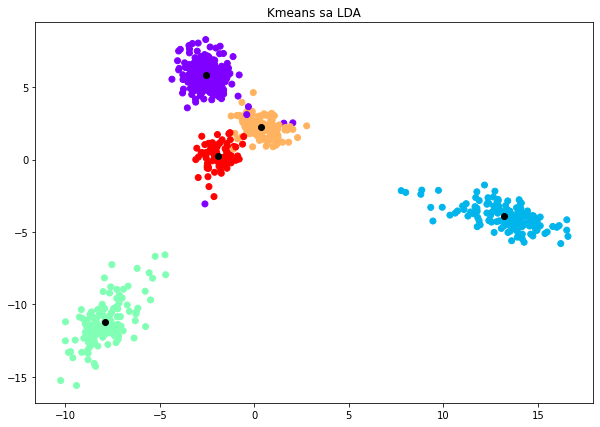

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_lda[:,0],data_lda[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Kmeans sa LDA')

In [ ]:
from sklearn import metrics
print('ARI: ', metrics.adjusted_rand_score(cluster.labels_, kmeans.labels_))
print('SIL for AGG: ', metrics.silhouette_score(data_lda, cluster.labels_, metric='euclidean'))
print('SIL for Kmeans: ', metrics.silhouette_score(data_lda, kmeans.labels_, metric='euclidean'))
print('CH for AGG: ', metrics.calinski_harabasz_score(data_lda, cluster.labels_))
print('CH for Kmeans: ', metrics.calinski_harabasz_score(data_lda, kmeans.labels_))
print('DB for AGG: ', metrics.davies_bouldin_score(data_lda, cluster.labels_))
print('DB for Kmeans: ', metrics.davies_bouldin_score(data_lda, kmeans.labels_))

ARI:  0.9944448535217655
SIL for AGG:  0.8336278802589335
SIL for Kmeans:  0.8342790827667562
CH for AGG:  6140.635592684016
CH for Kmeans:  6268.279134521441
DB for AGG:  0.2251230530755893
DB for Kmeans:  0.22596710475317855


OBA?

In [ ]:
pca = PCA(n_components=0.9)
pca.fit(data_center)
data_pca = pca.transform(data_center)
print('Redukovani prostor ima dimenziju: ', pca.n_components_)

lda = LinearDiscriminantAnalysis(n_components=4)
lda.fit(data_pca, y)
data_oba = lda.transform(data_pca)

Redukovani prostor ima dimenziju:  311


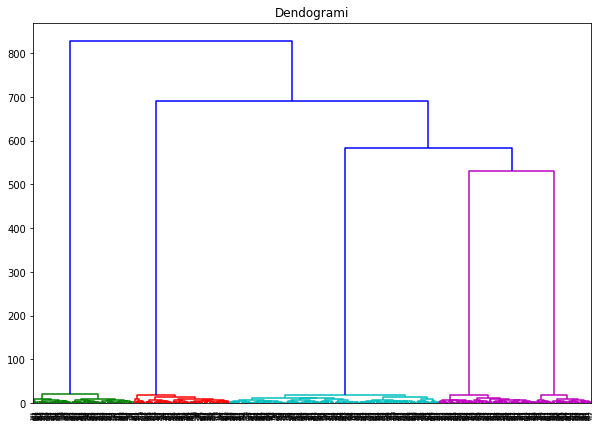

In [ ]:
plt.figure(figsize=(10, 7))
plt.title("Dendogrami")
dend = shc.dendrogram(shc.linkage(data_oba, method='ward', metric='euclidean'))

In [ ]:
start = time.time()

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data_oba)
print(cluster.labels_)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[2 4 2 2 3 2 0 2 3 2 3 0 2 3 3 3 4 0 0 2 3 0 4 3 0 4 1 3 3 3 3 3 0 3 2 3 0
 4 3 3 0 2 2 0 0 3 2 1 3 4 3 4 3 2 1 3 3 1 0 3 4 0 3 4 2 1 3 2 0 3 0 3 3 4
 3 4 3 0 2 1 3 2 3 3 2 2 3 3 0 3 2 2 3 3 3 2 1 3 2 3 3 0 3 0 4 0 4 1 4 4 2
 3 4 2 3 0 0 0 3 3 4 0 4 3 2 2 2 3 0 4 1 3 1 3 3 0 4 3 0 1 3 2 3 0 4 1 2 3
 4 4 4 4 3 3 4 3 3 2 2 4 2 4 0 3 2 4 1 0 4 3 0 4 3 4 3 3 3 2 3 0 1 0 3 2 2
 2 4 4 3 4 4 0 4 2 4 3 3 3 4 4 3 0 0 0 0 2 3 2 3 4 4 3 2 3 2 3 3 3 4 3 0 4
 0 0 4 3 0 2 3 4 4 2 1 3 0 2 0 1 3 0 0 4 2 2 4 4 0 3 3 1 3 2 1 3 2 0 2 2 2
 3 1 1 4 1 1 2 4 3 3 0 0 3 1 2 0 2 3 3 0 3 3 3 3 4 4 3 3 3 0 0 0 0 3 3 3 0
 3 3 4 2 3 3 1 4 2 3 3 3 1 3 2 3 1 4 4 2 0 3 0 0 4 1 0 3 3 3 3 0 3 3 2 3 0
 3 4 2 0 3 2 1 3 3 3 4 4 4 3 3 2 4 3 0 3 1 1 4 3 0 3 3 3 1 4 1 0 2 0 3 3 0
 3 1 2 4 2 3 0 2 3 1 0 0 1 1 2 3 3 1 0 3 2 3 3 3 4 4 0 4 3 0 1 2 3 4 2 3 3
 3 4 3 3 2 3 2 1 3 4 3 3 4 3 3 3 0 4 2 3 2 0 3 0 1 3 2 4 0 3 3 0 3 4 3 3 2
 1 3 0 4 2 3 2 3 3 3 3 0 4 3 0 3 3 4 4 0 1 2 1 3 0 0 3 2 0 1 4 4 3 2 2 3 2
 4 0 2 3 4 2 4 3 3 1 4 0 

Text(0.5, 1.0, 'Anglomerativno sa oba')

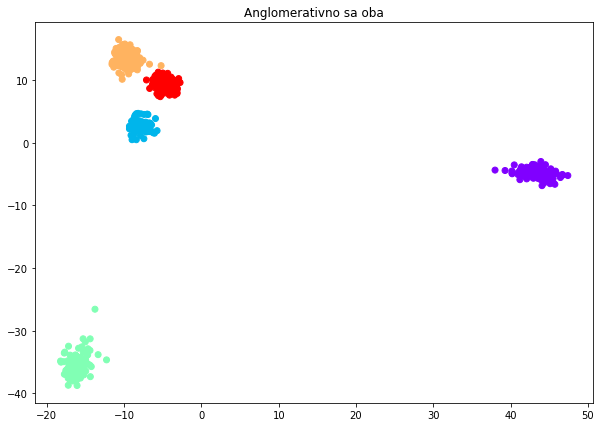

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_oba[:,0], data_oba[:,1], c=cluster.labels_, cmap='rainbow')
plt.title('Anglomerativno sa oba')

In [ ]:
from sklearn.cluster import KMeans

start = time.time()

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300, 
                init='k-means++',random_state=42)
# init moze biti 'random' uzorci ili odredjene vrednosti date matricom
kmeans.fit_predict(data_oba)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[[ -9.64227052  13.32515399  12.98497696   3.30370172]
 [-16.09453765 -35.3043754    4.25688399  -2.22600561]
 [ 43.4932726   -4.88778361   2.63004326   1.27398197]
 [ -4.61509682   9.2812919  -17.81168174 -22.1698862 ]
 [ -7.91988296   2.67696289 -30.08933977  28.86639529]]
[1 3 1 1 0 1 2 1 0 1 0 2 1 0 0 0 3 2 2 1 0 2 3 0 2 3 4 0 0 0 0 0 2 0 1 0 2
 3 0 0 2 1 1 2 2 0 1 4 0 3 0 3 0 1 4 0 0 4 2 0 3 2 0 3 1 4 0 1 2 0 2 0 0 3
 0 3 0 2 1 4 0 1 0 0 1 1 0 0 2 0 1 1 0 0 0 1 4 0 1 0 0 2 0 2 3 2 3 4 3 3 1
 0 3 1 0 2 2 2 0 0 3 2 3 0 1 1 1 0 2 3 4 0 4 0 0 2 3 0 2 4 0 1 0 2 3 4 1 0
 3 3 3 3 0 0 3 0 0 1 1 3 1 3 2 0 1 3 4 2 3 0 2 3 0 3 0 0 0 1 0 2 4 2 0 1 1
 1 3 3 0 3 3 2 3 1 3 0 0 0 3 3 0 2 2 2 2 1 0 1 0 3 3 0 1 0 1 0 0 0 3 0 2 3
 2 2 3 0 2 1 0 3 3 1 4 0 2 1 2 4 0 2 2 3 1 1 3 3 2 0 0 4 0 1 4 0 1 2 1 1 1
 0 4 4 3 4 4 1 3 0 0 2 2 0 4 1 2 1 0 0 2 0 0 0 0 3 3 0 0 0 2 2 2 2 0 0 0 2
 0 0 3 1 0 0 4 3 1 0 0 0 4 0 1 0 4 3 3 1 2 0 2 2 3 4 2 0 0 0 0 2 0 0 1 0 2
 0 3 1 2 0 1 4 0 0 0 3 3 3 0 0 1 3 0 2 0 4 4 3 0 

Text(0.5, 1.0, 'Kmeans sa oba')

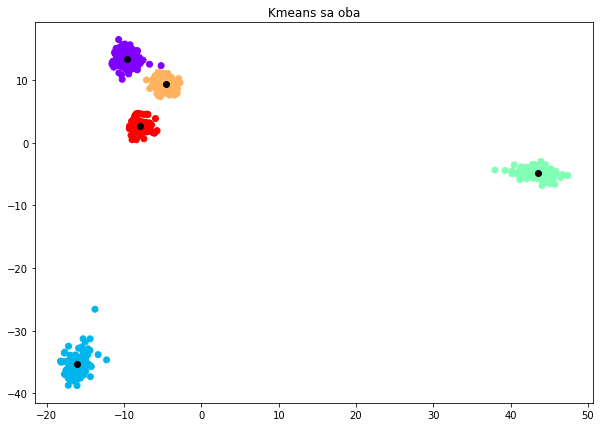

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_oba[:,0],data_oba[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.title('Kmeans sa oba')

In [ ]:
from sklearn import metrics
print('ARI: ', metrics.adjusted_rand_score(cluster.labels_, kmeans.labels_))
print('SIL for AGG: ', metrics.silhouette_score(data_oba, cluster.labels_, metric='euclidean'))
print('SIL for Kmeans: ', metrics.silhouette_score(data_oba, kmeans.labels_, metric='euclidean'))
print('CH for AGG: ', metrics.calinski_harabasz_score(data_oba, cluster.labels_))
print('CH for Kmeans: ', metrics.calinski_harabasz_score(data_oba, kmeans.labels_))
print('DB for AGG: ', metrics.davies_bouldin_score(data_oba, cluster.labels_))
print('DB for Kmeans: ', metrics.davies_bouldin_score(data_oba, kmeans.labels_))

ARI:  1.0
SIL for AGG:  0.9436688287551036
SIL for Kmeans:  0.9436688287551036
CH for AGG:  55878.868222885474
CH for Kmeans:  55878.868222885474
DB for AGG:  0.07598907367481059
DB for Kmeans:  0.07598907367481059


In [ ]:
from sklearn.cluster import DBSCAN
start = time.time()
clustering = DBSCAN(eps=10, min_samples=10).fit(data_oba)
clustering.labels_
print(clustering.labels_)

end = time.time()
print('vreme trajanja je: ', end - start, ' sekundi.')

[0 1 0 0 2 0 3 0 2 0 2 3 0 2 2 2 1 3 3 0 2 3 1 2 3 1 4 2 2 2 2 2 3 2 0 2 3
 1 2 2 3 0 0 3 3 2 0 4 2 1 2 1 2 0 4 2 2 4 3 2 1 3 2 1 0 4 2 0 3 2 3 2 2 1
 2 1 2 3 0 4 2 0 2 2 0 0 2 2 3 2 0 0 2 2 2 0 4 2 0 2 2 3 2 3 1 3 1 4 1 1 0
 2 1 0 2 3 3 3 2 2 1 3 1 2 0 0 0 2 3 1 4 2 4 2 2 3 1 2 3 4 2 0 2 3 1 4 0 2
 1 1 1 1 2 2 1 2 2 0 0 1 0 1 3 2 0 1 4 3 1 2 3 1 2 1 2 2 2 0 2 3 4 3 2 0 0
 0 1 1 2 1 1 3 1 0 1 2 2 2 1 1 2 3 3 3 3 0 2 0 2 1 1 2 0 2 0 2 2 2 1 2 3 1
 3 3 1 2 3 0 2 1 1 0 4 2 3 0 3 4 2 3 3 1 0 0 1 1 3 2 2 4 2 0 4 2 0 3 0 0 0
 2 4 4 1 4 4 0 1 2 2 3 3 2 4 0 3 0 2 2 3 2 2 2 2 1 1 2 2 2 3 3 3 3 2 2 2 3
 2 2 1 0 2 2 4 1 0 2 2 2 4 2 0 2 4 1 1 0 3 2 3 3 1 4 3 2 2 2 2 3 2 2 0 2 3
 2 1 0 3 2 0 4 2 2 2 1 1 1 2 2 0 1 2 3 2 4 4 1 2 3 2 2 2 4 1 4 3 0 3 2 2 3
 2 4 0 1 0 2 3 0 2 4 3 3 4 4 0 2 2 4 3 2 0 2 2 2 1 1 3 1 2 3 4 0 2 1 0 2 2
 2 1 2 2 0 2 0 4 2 1 2 2 1 2 2 2 3 1 0 2 0 3 2 3 4 2 0 1 3 2 2 3 2 1 2 2 0
 4 2 3 1 0 2 0 2 2 2 2 3 1 2 3 2 2 1 1 3 4 0 4 2 3 3 2 0 3 4 1 1 2 0 0 2 0
 1 3 0 2 1 0 1 2 2 4 1 3 

Text(0.5, 1.0, 'DBSCAN sa oba')

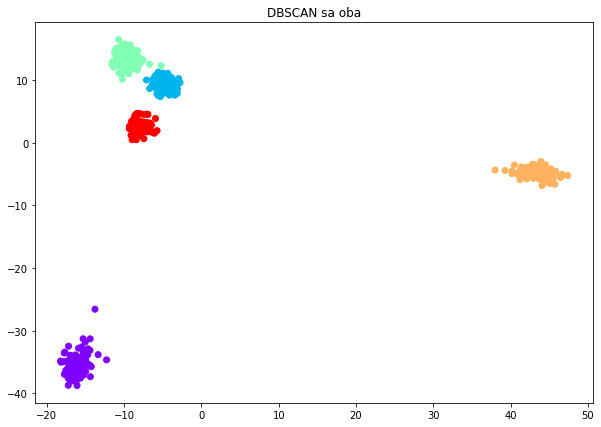

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(data_oba[:,0], data_oba[:,1], c=clustering.labels_, cmap='rainbow')
plt.title('DBSCAN sa oba')

In [ ]:
print('ARI: ', metrics.adjusted_rand_score(cluster.labels_, clustering.labels_))
print('SIL for DBSCAN: ', metrics.silhouette_score(data_oba, clustering.labels_, metric='euclidean'))
print('CH for DBSCAN: ', metrics.calinski_harabasz_score(data_oba, clustering.labels_))
print('DB for DBSCAN: ', metrics.davies_bouldin_score(data_oba, clustering.labels_))

ARI:  1.0
SIL for DBSCAN:  0.9436688287551036
CH for DBSCAN:  55878.868222885474
DB for DBSCAN:  0.07598907367481059
